In [33]:
# import importlib
import plot
# importlib.reload(plot)
# importlib.reload(training)


### How does AI even work?

Artificial Intelligence (AI) is a way for computers to try to act like humans think. It’s called “artificial” because it’s made by people, and “intelligence” because it tries to learn, reason, and make decisions — just like us.

When you learn something (like recognizing your friend’s face), your brain builds tiny connections between brain cells called neurons, and the more you practice, the stronger those connections get. That’s how you get better at certain things — your brain is adjusting its wiring to make smarter guesses.

AI works in a similar way — by combining a lot of little 'neurons', scientists and engineers hoped that a computer could learn to keep information in the same way. This, is what we call a **neural network**. 

Whether we're talking about human neurons, or artificial neurons, they both have a similar purpose:
- To take in information
- Decide how important/useful each bit of information is
- Send a signal to other neurons to keep that information. 

Much like babies, AI doesn't actually know how to do anything at the beginning. As it makes guesses, compares them to the correct answers, and changes the strength of its connections, it learns how to accomplish the task better. Over time, the network gets better and better, until it can do things that seem “smart.”

AI isn’t truly alive or conscious — it doesn’t feel things —
but it’s a tool built to copy the way we learn and solve problems. Neural networks are one of the main ways we teach computers to do that, inspired directly by how human brains work. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import plot
import training


### Input data

Before a neural network can learn anything, it needs examples — just like how you’d do practice problems before a test to learn the pattern behind the answers.

In this example, our goal is to predict whether a book will be popular or not. To help the neural network learn, we’ll give it a small set of “practice books” — books where we already know whether they ended up being popular. The network will study these examples to learn what makes something popular.

For each book, we know two pieces of information (called features) that might affect its popularity:
1. Genre Popularity Index – a number between 0 and 1 that tells how popular a certain genre is. 
    - For example, a fantasy novel might have a 0.9 (very popular), while an old textbook might have a 0.2 (not very popular).
2. Years Since Publication – how long ago the book was published.
    - A small number (like 1 or 2) means it’s pretty new, and a large number (like 10 or 12) means it’s been around for a while.

So, each book is represented by two numbers — one for genre popularity and one for age — and the network’s job is to learn the relationship between these features and whether the book is very popular (1) or very much not (0), or somewhere in between.

Once trained, the neural network should be able to look at new books (with just those two numbers!) and make its own prediction about whether they’ll be hits or misses.

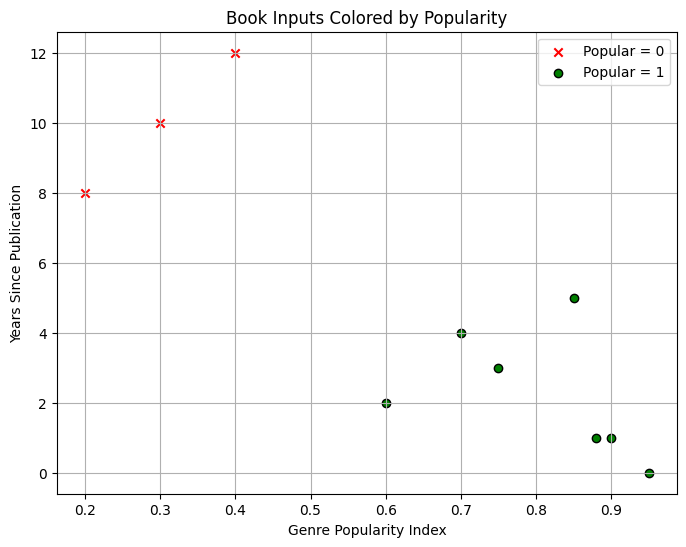

In [35]:
L = 3
n = [2, 3, 3, 1]
# X: [Genre Popularity Index, Years Since Publication]
X = np.array([
  [0.90, 1], # this genre is very popular (0.9) and is 1 years old
  [0.75, 3], # this genre is popular (0.75) and is 3 years old
  [0.30, 10], # this genre is not popular (0.3) and is 10 years old
  [0.85, 5], # this genre is popular (0.85) and is 5 years old
  [0.60, 2], # this genre is popular (0.6) and is 2 years old
  [0.95, 0], # this genre is very popular (0.95) and is 0 years old
  [0.40, 12], # this genre is not popular (0.4) and is 12 years old
  [0.70, 4], # this genre is popular (0.7) and is 4 years old
  [0.20, 8], # this genre is not popular (0.2) and is 8 years old
  [0.88, 1]  # this genre is very popular (0.88) and is 1 years old
])
# y: 1 = popular, 0 = not popular
y = np.array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1])
m = 10
A0 = X.T
Y = y.reshape(n[L], m)

plot.plot_inputs_by_output(A0, y)


### The First Step: Feed Forward
There are a few parts that work together to make a neural network. The first step is teaching the computer how to make a guess. This part is called feed forward, because the data moves forward through the computer. For example, if you’re trying to see if a picture is a cat or a dog, the computer looks at the picture and sends the information forward to make its best guess, just like you might step closer to see the picture better before deciding what it is.

There's many different parts of the computer that comes together to make this happen:

#### Neurons
Each neuron receives input, performs a calculation (usually a weighted sum of its inputs plus a bias), and passes the result through an activation function. The output is then sent to neurons in the next layer.

#### Layers
The neurons in a neural network are arranged in many layers, to pass information on more efficiently. This can be thought of as a relay race, but before passing on the baton, every layer has their own specific task to achieve.  

- **Input layer**: This is where the information comes in. It’s like the starting line — the network receives the data about each book (for example, its genre and how old it is).
- **Hidden layers**: These are the middle steps, where the network thinks. The neurons here look for patterns — maybe they notice that new books in popular genres usually do well.
- **Output layer**: This is the finish line, where the network gives its answer. It might say, “Yes! This book looks popular!” or “No, probably not.”

#### Weights
Every connection between neurons has a weight — it tells the network how important that piece of information is.

- A big weight means “this really matters.”
- A small weight means “this doesn’t matter much.”

When the network learns, it changes these weights — just like you adjust your guesses after checking your answers on homework.
#### Biases
Biases allow the network to shift the activation of neurons. They provide flexibility by enabling neurons to activate even when the weighted sum of inputs is zero.




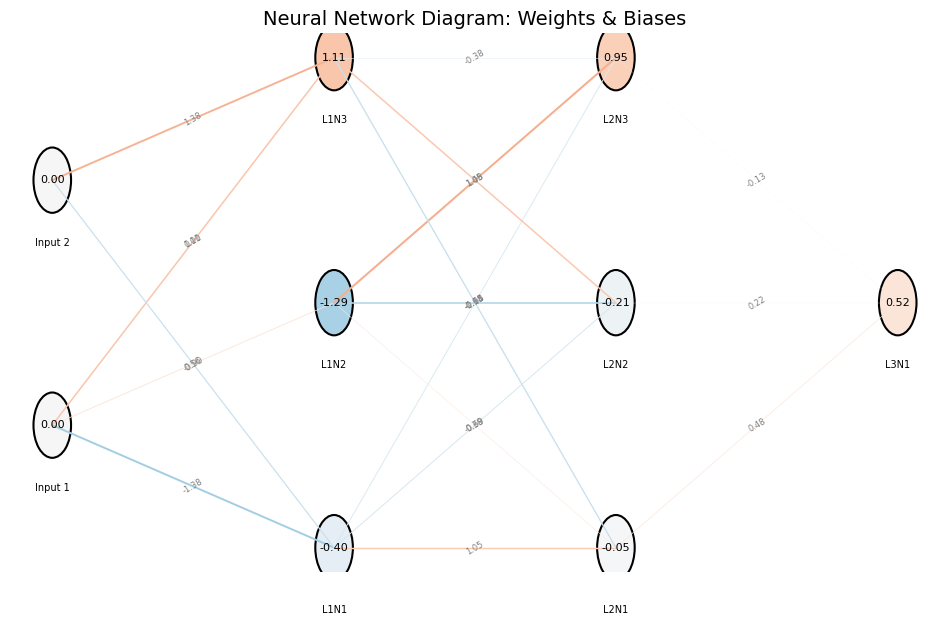

In [36]:
# This code initializes all the different components of a neural network that we just talked about, and then draws it out!
L = 3
n = [2, 3, 3, 1]


W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])

b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

weights = [W1, W2, W3]
biases = [b1, b2, b3]

plot.draw_network(n, weights, biases)

#### Activation function
After a neuron processes all its input information, it has to decide — “Should I fire or stay quiet?”

The activation funciton is like a decision switch. If the signal coming in is strong enough, the neuron “fires” and sends its message to the next layer. If the signal is weak, it might stay quiet or send only a tiny signal.

It helps the network make more realistic, flexible decisions — not just “yes or no,” but sometimes “a little bit” or “a lot.”

These activation functions are usually well-known and have special names.
In our case, we’re using something called the sigmoid function, which turns the neuron’s output into a number between 0 and 1 — like a smooth dimmer switch instead of a simple on/off light.

If you’re curious, you can explore how it works later on — it’s a fun peek into the math behind how AI “thinks.”

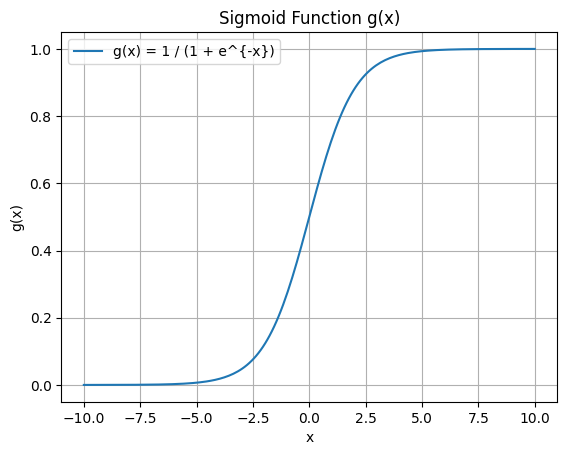

In [37]:
def g(z):
  return 1 / (1 + np.exp(-1 * z))
plot.draw_g()


In [38]:
def feed_forward(A0):
  # layer 1 calculations
  Z1 = W1 @ A0 + b1
  A1 = g(Z1)

  # layer 2 calculations
  Z2 = W2 @ A1 + b2
  A2 = g(Z2)

  # layer 3 calculations
  Z3 = W3 @ A2 + b3
  A3 = g(Z3)

  cache = {
      "A0": A0,
      "A1": A1,
      "A2": A2
  }

  return A3, cache

### Step 2: Back-Propogation
After the computer makes a guess during feed forward, it needs to check how close that guess was to the right answer. This checking-and-fixing step is called backpropagation — it’s how the computer learns from its mistakes!


In [39]:
def cost(y_hat, y):
  """
  y_hat should be a n^L x m matrix
  y should be a n^L x m matrix
  """
  # 1. losses is a n^L x m
  losses = - ( (y * np.log(y_hat)) + (1 - y)*np.log(1 - y_hat) )

  m = y_hat.reshape(-1).shape[0]

  # 2. summing across axis = 1 means we sum across rows, 
  #   making this a n^L x 1 matrix
  summed_losses = (1 / m) * np.sum(losses, axis=1)

  # 3. unnecessary, but useful if working with more than one node
  #   in output layer
  return np.sum(summed_losses)



To learn, the computer needs to know how far off its guess was. We use something called a cost function to measure that.

Think of it like a grade that you might get in class. It's a number that tells the computer how “bad” its guess was:
- A big cost means the computer guessed really wrong (for example, the computer guessed "cat" for a picture that was obviously a floppy-eared dog)
![that's a dog...|20%](dogcat/beagle.jpg)
- A small cost means the computer was close (maybe the computer guessed "cat" for a dog with pointy ears)
![not quite - that's a shiba inu](dogcat/shibainu.jpg)
- A cost of 0 means the computer got it perfectly right! (the computer guessed "cat" for a cat)
![success! a real cat](dogcat/cat.jpg)

The computer keeps on adjusting its brain connections over and over again, making tiny changes every time, until its guesses get better and better. 

In [40]:
def backprop_layer_3(y_hat, Y, m, A2, W3):
  A3 = y_hat
  
  # step 1. calculate dC/dZ3 using shorthand we derived earlier
  dC_dZ3 = (1/m) * (A3 - Y)
  assert dC_dZ3.shape == (n[3], m)


  # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3 
  #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
  dZ3_dW3 = A2
  assert dZ3_dW3.shape == (n[2], m)

  dC_dW3 = dC_dZ3 @ dZ3_dW3.T
  assert dC_dW3.shape == (n[3], n[2])

  # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
  dC_db3 = np.sum(dC_dZ3, axis=1, keepdims=True)
  assert dC_db3.shape == (n[3], 1)

  # step 4. calculate propagator dC/dA2 = dC/dZ3 * dZ3/dA2
  dZ3_dA2 = W3 
  dC_dA2 = W3.T @ dC_dZ3
  assert dC_dA2.shape == (n[2], m)
  return dC_dW3, dC_db3, dC_dA2

def backprop_layer_2(propagator_dC_dA2, A1, A2, W2):

  # step 1. calculate dC/dZ2 = dC/dA2 * dA2/dZ2

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA2_dZ2 = A2 * (1 - A2)
  dC_dZ2 = propagator_dC_dA2 * dA2_dZ2
  assert dC_dZ2.shape == (n[2], m)


  # step 2. calculate dC/dW2 = dC/dZ2 * dZ2/dW2 
  dZ2_dW2 = A1
  assert dZ2_dW2.shape == (n[1], m)

  dC_dW2 = dC_dZ2 @ dZ2_dW2.T
  assert dC_dW2.shape == (n[2], n[1])

  # step 3. calculate dC/db2 = np.sum(dC/dZ2, axis=1, keepdims=True)
  dC_db2 = np.sum(dC_dW2, axis=1, keepdims=True)
  assert dC_db2.shape == (n[2], 1)

  # step 4. calculate propagator dC/dA1 = dC/dZ2 * dZ2/dA1
  dZ2_dA1 = W2
  dC_dA1 = W2.T @ dC_dZ2
  assert dC_dA1.shape == (n[2], m)

  return dC_dW2, dC_db2, dC_dA1

def backprop_layer_1(propagator_dC_dA1, A1, A0, W1):

  # step 1. calculate dC/dZ1 = dC/dA1 * dA1/dZ1

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA1_dZ1 = A1 * (1 - A1)
  dC_dZ1 = propagator_dC_dA1 * dA1_dZ1
  assert dC_dZ1.shape == (n[1], m)


  # step 2. calculate dC/dW1 = dC/dZ1 * dZ1/dW1 
  dZ1_dW1 = A0
  assert dZ1_dW1.shape == (n[0], m)

  dC_dW1 = dC_dZ1 @ dZ1_dW1.T
  assert dC_dW1.shape == (n[1], n[0])

  # step 3. calculate dC/db1 = np.sum(dC/dZ1, axis=1, keepdims=True)
  dC_db1 = np.sum(dC_dW1, axis=1, keepdims=True)
  assert dC_db1.shape == (n[1], 1)

  return dC_dW1, dC_db1

### Putting it all together!

A neural network learns in two big steps:
1. Feed forward – The computer looks at the data and makes a guess.
2. Backpropagation – The computer checks if the guess was right or wrong, then fixes its mistakes to do better next time.

It keeps doing these steps over and over—guessing, checking, and learning—until it gets really good at the task! Just like how you practice math problems or spelling words, the more it practices, the smarter it gets. 

In [41]:
# set learning rate to 0.1 for now

def train(alpha=0.1):
  # must use global keyword in order to modify global variables
  global W3, W2, W1, b3, b2, b1

  epochs = 2000 # training for 1000 iterations
  costs = [] # list to store costs

  for e in range(epochs):
    # 1. FEED FORWARD
    y_hat, cache = feed_forward(A0)
    
    # 2. COST CALCULATION
    error = cost(y_hat, Y)
    costs.append(error)

    # 3. BACKPROP CALCULATIONS

    dC_dW3, dC_db3, dC_dA2 = backprop_layer_3(
        y_hat, 
        Y, 
        m, 
        A2= cache["A2"], 
        W3=W3
    )

    dC_dW2, dC_db2, dC_dA1 = backprop_layer_2(
        propagator_dC_dA2=dC_dA2, 
        A1=cache["A1"],
        A2=cache["A2"],
        W2=W2
    )

    dC_dW1, dC_db1 = backprop_layer_1(
        propagator_dC_dA1=dC_dA1, 
        A1=cache["A1"],
        A0=cache["A0"],
        W1=W1
    )

    # 4. UPDATE WEIGHTS
    W3 = W3 - (alpha * dC_dW3)
    W2 = W2 - (alpha * dC_dW2)
    W1 = W1 - (alpha * dC_dW1)

    b3 = b3 - (alpha * dC_db3)
    b2 = b2 - (alpha * dC_db2)
    b1 = b1 - (alpha * dC_db1)

  return costs

After we teach the computer many times, we can make a graph to see how well it’s learning. The bottom (x-axis) shows how many times the computer has practiced — we call these epochs. The side (y-axis) shows the cost, or how wrong the computer’s guesses are.

If the computer is learning well, the line on the graph will go down over time. That means it’s making fewer mistakes! A smooth line that goes down means it’s learning nicely.

If the line stops going down, it might mean the computer has learned all that it can learn, which often is pretty good!

If the line jumps up and down a lot, it might be learning too fast or getting confused.

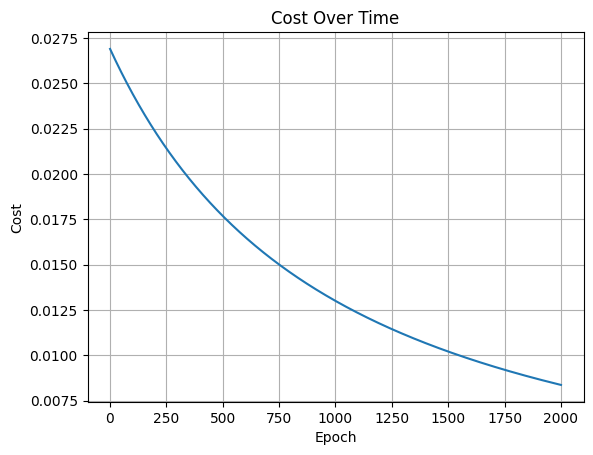

In [44]:
costs = train()
# Generate epochs based on costs length
epochs = range(1, len(costs) + 1)
plot.plot_epochs_costs(epochs, costs)

### How *fast* does the computer learn?
The learning rate controls how big the computer’s steps are when it’s trying to get better.

If the steps are too small, the computer learns very slowly — kind of like studying for only 30 minutes each day. You’ll learn, but it takes a long time!

If the steps are too big, the computer might jump past the right answer — like trying to learn everything in one long, rushed, hours-long study session. You might get confused or even forget what you learned!

So, we want a learning rate that’s just right — not too small, not too big — so the computer learns smoothly and improves every time.

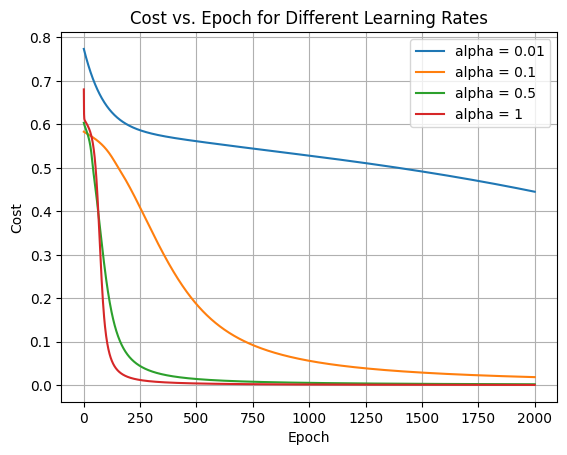

In [45]:
alpha_values = [0.01, 0.1, 0.5, 1]  # Try different learning rates
costs_by_alpha = {}

# Train with each alpha and store the costs
for alpha in alpha_values:
    costs = training.train(alpha=alpha)
    costs_by_alpha[alpha] = costs

# Plot all curves
for alpha, costs in costs_by_alpha.items():
    epochs = range(1, len(costs) + 1)
    plt.plot(epochs, costs, label=f'alpha = {alpha}')

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

We tested a bunch of learning rates, to see which one works the best. 

When the learning rate is smaller, the computer takes tiny steps — it learns carefully but slowly, so the line goes down slowly. When the learning rate is larger, the computer takes big steps — it can learn quickly at first, but if the steps are too big, it might skip over the right answer or get confused.

What we found, is that the best learning rate is somewhere in the Goldilocks zone — where the cost goes down smoothly, and the computer keeps learning without getting stuck or jumping around. 

### So... Why is this important?

AI is changing the world around us. It helps doctors spot diseases, cars drive safely, and phones understand our voices. But more than that, it shows us how computers can learn — not just follow rules.

By understanding how AI learns through feed forward and backpropagation, we learn how to teach computers to think, solve problems, and even help people in new ways.

The better we understand AI, the better we can use it to make the world smarter, fairer, and more creative for everyone.